 # Project_YouTube_Streamer_Analysis

# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # interactive visualizations
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading csv file into the pandas dataframe

data = pd.read_csv("youtubers.csv")

In [3]:
# creating a copy of dataset using copy() function

df = data.copy()

In [4]:
# to get the top 05 rows of dataset head() is used.

df.head()

Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...

In [5]:
# to check the information of dataset info() is used.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


From the provided DataFrame information, several key points can be noted:

1. **Data Structure**:
   - The DataFrame contains 1000 entries with 9 columns.
   - Columns include "Rank", "Username", "Categories", "Subscribers", "Country", "Visits", "Likes", "Comments", and "Links".

2. **Data Types**:
   - The "Rank" column is of integer type ("int64").
   - The "Username", "Categories", "Country", and "Links" columns are of object type ("object"), which usually indicates strings.
   - The "Subscribers", "Visits", "Likes", and "Comments" columns are of float type ("float64").

3. **Missing Values**:
   - The "Categories" column has 306 missing values out of 1000 entries.
   - Other columns do not have any missing values.


In [6]:
# Checking description using describe()

df.describe()

Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000



1. **Count**:
   - The count indicates the number of non-null values present in each column.ns.

2. **Mean**:
   - The mean represents the average value of each columexample, the average rank of channels is approximately 500.5, and the average number of subscribers is approximately 21.89 million.

3. **Standard Deviation (std)**:
   - The standard deviation measures the dispersion or spread of values around the mean.
   - A higher standard deviation indicates greater variability in the data.
   - For instance, the standard deviation for subscribers is approximately 16.83 million, indicating significant variability in the number of subscribers among channels.

4. **Minimum (min)** and **Maximum (max)**:
   - The minimum and maximum values represent the smallest and largest values in each column, respectively.
   - For example, the minimum rank is 1, and the maximum rank is 1000.
   - Similarly, the minimum number of subscribers is 11.7 million, while the maximum number of subscribers is 249.5 million.

5. **Quartiles (25%, 50%, 75%)**:
   - Quartiles divide the data into four equal parts.
   - The 25th percentile (Q1) represents the value below which 25% of the data falls.
   - The median (50th percentile or Q2) represents the middle value of the dataset.
   - The 75th percentile (Q3) represents the value below which 75% of the data falls.
   - For example, 25% of channels have a rank below 250.75, 50% have a rank below 500.5, and 75% have a rank below 750.25.
   - Similarly, for subscribers, visits, likes, and comments, these quartiles provide insights into the distribution of these metrics among channels.

These summary statistics provide a snapshot of the distribution and variability of the numerical columns in the DataFrame, which can be useful for understanding the data before performing further analysis or modeling.

In [7]:
# check the columns we fine a columns starting with upper case 
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [8]:
# columns convert is lower case 
df.columns = df.columns.str.lower()

In [9]:
df.columns

Index(['rank', 'username', 'categories', 'suscribers', 'country', 'visits',
       'likes', 'comments', 'links'],
      dtype='object')

In [10]:
# correccting the column name 
df.rename(columns={'suscribers': 'subscribers'}, inplace=True)

In [11]:
df.isnull().sum()

rank             0
username         0
categories     306
subscribers      0
country          0
visits           0
likes            0
comments         0
links            0
dtype: int64

* Categories has 306 missing values* from the above, we only have one column (Categories) containing missing data (306). All other columns have no mising data


In [12]:
df.isnull().sum() / len(df) * 100

rank            0.0
username        0.0
categories     30.6
subscribers     0.0
country         0.0
visits          0.0
likes           0.0
comments        0.0
links           0.0
dtype: float64

* check the missing values in percentage 30%  missig value is categories column 

<Axes: >

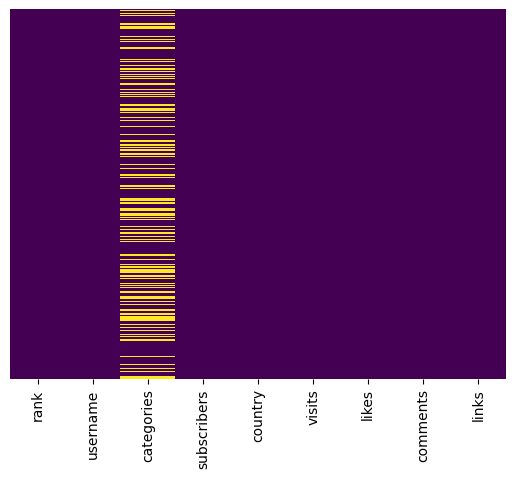

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# impute missing values in a categories column
df['categories'] = df['categories'].fillna(df['categories'].mode()[0])

In [15]:
df.isnull().sum()


rank           0
username       0
categories     0
subscribers    0
country        0
visits         0
likes          0
comments       0
links          0
dtype: int64

In [16]:
# check the dublicate values fine out the, no any duplicate value in dataset
df.duplicated().sum()

0

In [17]:
df.head()

rank       username           categories  subscribers         country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia       Música y baile  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        visits      likes  comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...

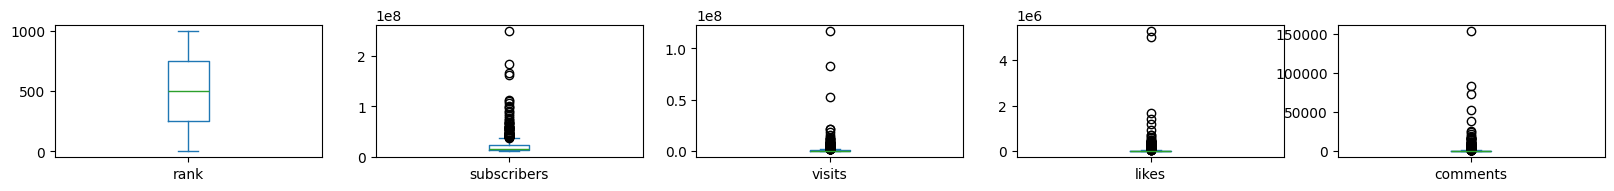

In [18]:
# Checking for the outliers in all columns at once using box plot.
df.plot(kind ="box", subplots=True,layout =(5,5), figsize =(20,10))
plt.show()

In [19]:
# Calculate z-scores for the 'subscribers' column
z_scores = np.abs((df['subscribers'] - df['subscribers'].mean()) / df['subscribers'].std())

# Set the threshold for outliers (e.g., z-score > 3)
threshold = 3

# Remove outliers
df_new = df[z_scores <= threshold]

# Print the shape of the original and modified dataset
print("Original dataset shape:", df.shape)
print("Dataset shape without outliers:", df_new.shape)

Original dataset shape: (1000, 9)
Dataset shape without outliers: (983, 9)


In [20]:
# old dataset 
df.shape

(1000, 9)

In [21]:
# new dataset
df_new.shape

(983, 9)

# **Trend Analysis:**
- dentify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?


In [22]:
likes_correlation = df_new['subscribers'].corr(df['likes'])

# Calculate the correlation between Subscribers and Comments
comments_correlation = df_new['subscribers'].corr(df['comments'])

print("Correlation between subscribers and Likes:", likes_correlation)
print("Correlation between subscribers and Comments:", comments_correlation)

Correlation between subscribers and Likes: 0.04646053480778754
Correlation between subscribers and Comments: 0.030507782649834773


In [23]:
# Calculate the mean of the Subscribers column
mean_subscribers = df_new['subscribers'].mean()
print(f"The Mean of Subscribers is: {round(mean_subscribers, 2)}")
# Calculate the median of the Subscribers column
median_subscribers = df_new['subscribers'].median()
print(f"The Median of Subscribers is: {round(median_subscribers, 2)}")
# Calculate the mode of the Subscribers column
mode_subscribers = df_new['subscribers'].mode()
print(f"The Mode of Subcribers is: {round(mode_subscribers, 2)}")
# Calculate the standard deviation of the Subscribers column
std_subscribers = df_new['subscribers'].std()
print(f"The Standard Deviation of Subcribers is: {round(std_subscribers, 2)}")

The Mean of Subscribers is: 20278840.28
The Median of Subscribers is: 16600000.0
The Mode of Subcribers is: 0    12600000.0
Name: subscribers, dtype: float64
The Standard Deviation of Subcribers is: 9846347.03


# **Audience Study:**
- Analyze the distribution of streamers
audiences by country. Are there regional preferences for
specific content categories?

### 2a. POPULAR CATEGORIES  - NUMBER OF STREAMERS

In [24]:
# finding the number of streamers by category
popular_category = df['categories'].value_counts()

# resetting the index
popular_category_df = popular_category.reset_index()

# new column names
popular_category_df.columns = ['Category', 'Total No. of Streamers / Category']

# inspecting our data
popular_category_df.head()

Category  Total No. of Streamers / Category
0             Música y baile                                466
1       Películas, Animación                                 61
2  Música y baile, Películas                                 41
3              Vlogs diarios                                 37
4        Noticias y Política                                 36

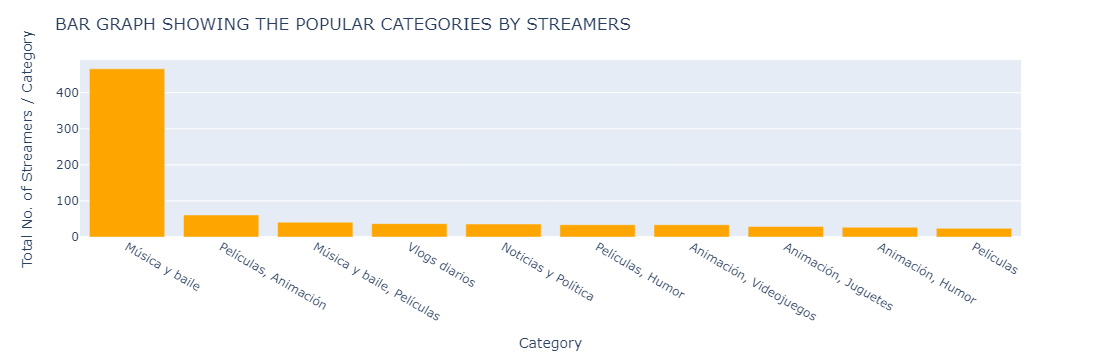

In [25]:
# entering data for the figure variable we created
fig = px.bar(data_frame=popular_category_df.head(10), x='Category', y='Total No. of Streamers / Category', color_discrete_sequence=['orange'])

# adding title to our graph
fig.update_layout(title = 'BAR GRAPH SHOWING THE POPULAR CATEGORIES BY STREAMERS')

# display chart
fig.show()

NOTE: It should be noted however that from my analysis above, there were missing categories and I used the most frequent category to replace the missing ones. 

From the graph shown above, the following can be inferred:

1. It can be seen that the most popular category is Música y baile, having a total frequency of 466. 

2. Most youtube streamers are in the music industry. Therefore, it is only normal to have a high number of this category - Música y baile (Music and Dance). 

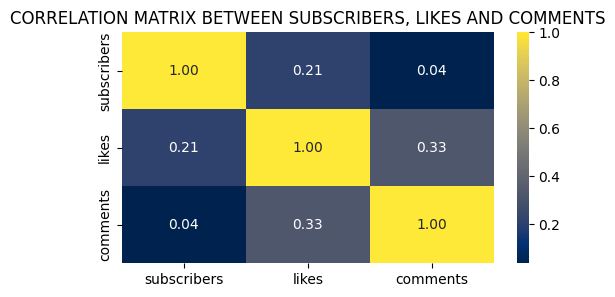

In [26]:
# finding the correlation between subscribers, visits, likes and comments of youtube streamers
correlation_matrix = df[['subscribers', 'likes', 'comments']].corr()

# creating a heatmap to better understand the correlation between the variables
# setting the size of the figure
plt.figure(figsize=(6, 3))

# plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt='.2f')

# including the title of the plot
plt.title('CORRELATION MATRIX BETWEEN SUBSCRIBERS, LIKES AND COMMENTS')

# visualizing the plot
plt.show()

#### Based on the correlation matrix above, there is no correlation between Subscribers, Likes and Comments. They all have correlation values tending towards zero. Hence, no relationship exists between them.

### 3a. AUDIENCE STUDY - BY STREAMERS

In [27]:
# Count the number of streamers in each category
categories_counts = df['categories'].value_counts()
print(categories_counts)

categories
Música y baile                        466
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehí

In [28]:
streamers_country = df.groupby('country')['username'].value_counts().reset_index()
streamers_country.columns = ['country', 'streamers', 'number of streamers']
streamers_country.head()

country         streamers  number of streamers
0  Arabia Saudita        BanderitaX                    1
1  Arabia Saudita      katakit_baby                    1
2  Arabia Saudita          mmoshaya                    1
3  Arabia Saudita       rotanamusic                    1
4         Argelia  ArabGamesNetwork                    1

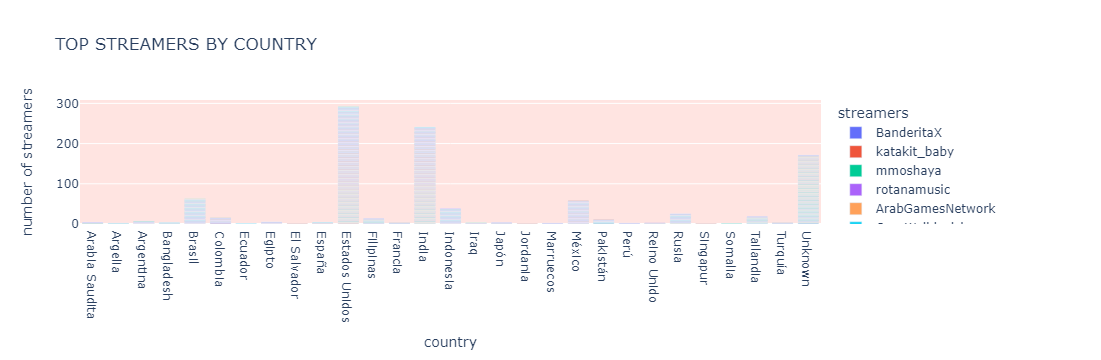

In [29]:
# creating a bar chart to visualize the above
fig = px.bar(streamers_country, x='country', y='number of streamers', title= 'TOP STREAMERS BY COUNTRY', color='streamers')
fig.update_layout(plot_bgcolor='mistyrose')
fig.show()


from the graph, the following can be noted:
- USA has the highest number of streamers - over 250 youtube streamers are from the United States of America. 
- India has the second highest number of streamers - over 230 youtube streamers
- The 'Unknown Country' has the third highest number of streamers. Why the country is not known cannot be guessed.
- Brazil and Mexico have at least 50 youtube streamers.

From the above, we can infer that USA is home to a large number of youtube streamers from around the world. This could be as a result of the country's cultural diversity and contents.

### 3b. AUDIENCE STUDY - BY CATEGORIES AND COUNTRY

In [30]:
# checking the number of subscribers by country
country_category = df.groupby('country')['categories'].value_counts().sort_values(ascending=False)

# resetting the index so as to rename columns properly
country_category_df = country_category.reset_index()

# new column names
country_category_df.columns = ['country', 'category', 'number of categories']

In [31]:
country_category_df.head()

country             category  number of categories
0           India       Música y baile                   171
1  Estados Unidos       Música y baile                   120
2         Unknown       Música y baile                    53
3          Brasil       Música y baile                    30
4         Unknown  Animación, Juguetes                    28

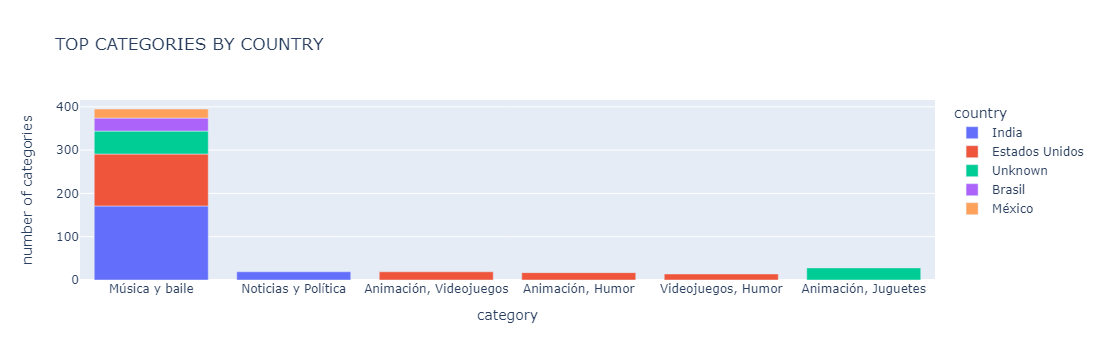

In [32]:
# creating a bar chart to visualize the above
fig = px.bar(country_category_df.head(10), x='category', y='number of categories', title= 'TOP CATEGORIES BY COUNTRY', color = 'country')
fig.show()

from the above, it is clear that the Musica y baile has the highest number of category by streamers' country. 
- Music and Dance:
        India has the largest number of category
        India is generally recognized for this. It is closely followed by USA, Brazil and Mexico
        
- News and Politics: 
        India takes the highest number for this category - 19
        
- Animation and Video Games:
    The USA records the highest number for this category - 19
    The USA also records the highest number of category for Video Games and Humor - 14.

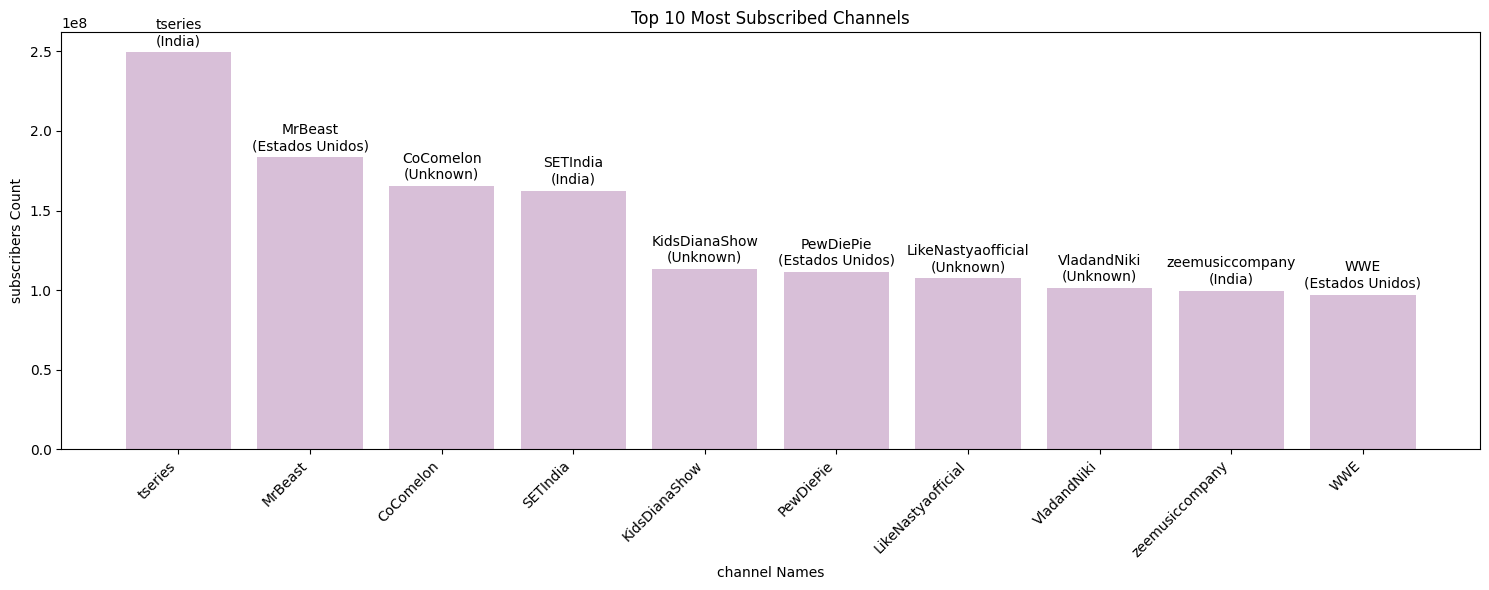

In [33]:
# Visualizibg Top10 most subscribed channels with there country names
plt.figure(figsize=(15, 6))
top_10_channels = df.sort_values(by='subscribers', ascending=False).head(10)
bars = plt.bar(top_10_channels['username'], top_10_channels['subscribers'], color='thistle')
plt.xlabel('channel Names')
plt.ylabel('subscribers Count')
plt.title('Top 10 Most Subscribed Channels')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Displaying channel names and corresponding country names on top of the bars
for bar, username, country in zip(bars, top_10_channels['username'], top_10_channels['country']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * max(top_10_channels['subscribers']),
             f"{username}\n({country})", ha='center', va='bottom')

plt.tight_layout()
plt.show()

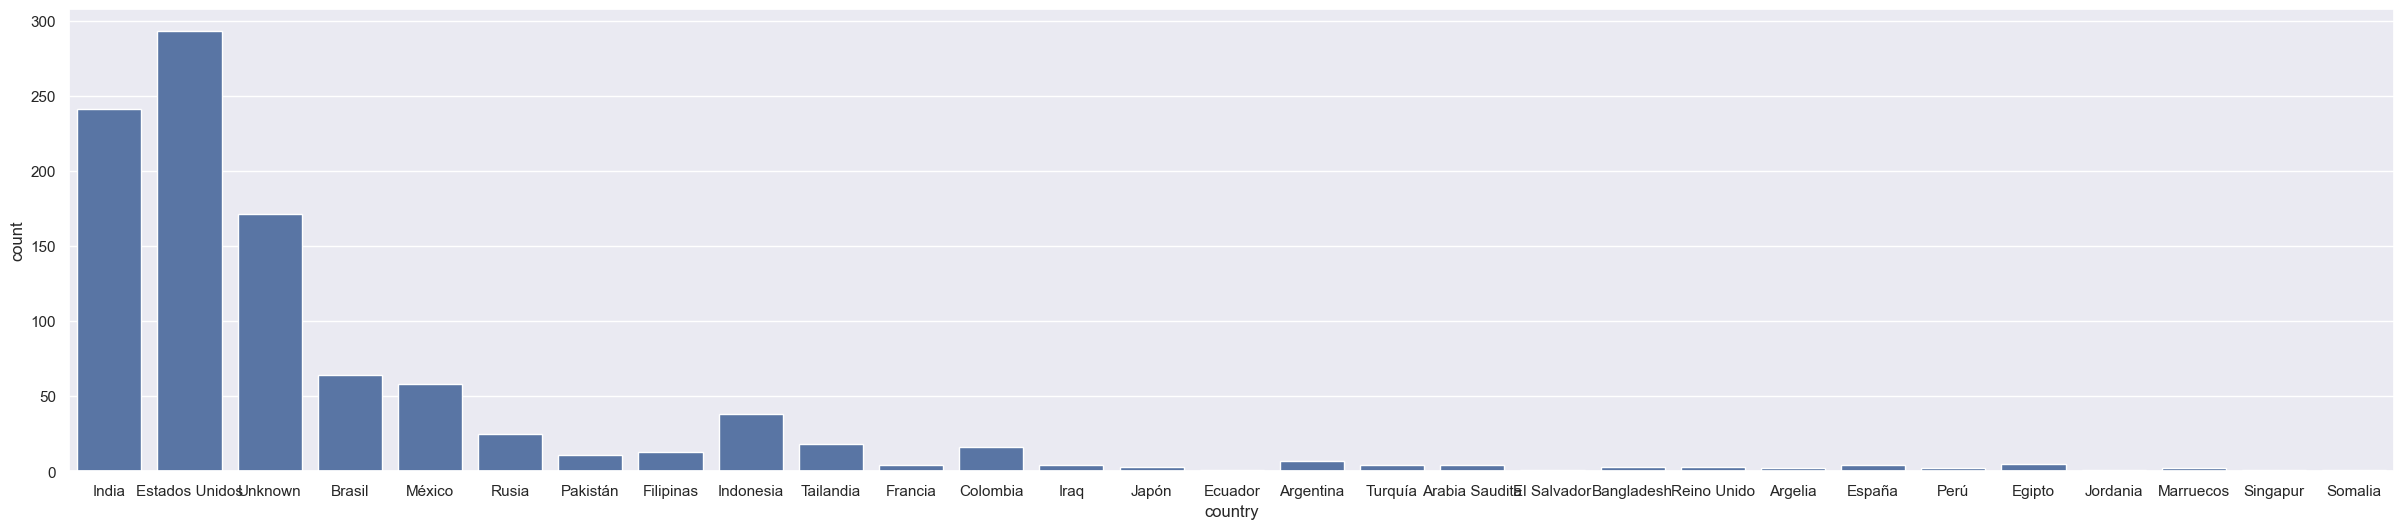

In [34]:
# visualizing countries with num of youtube channel
sns.set(rc={'figure.figsize':(30,6)})
ax=sns.countplot(x='country',data=df)

In [35]:
df.head()

rank       username           categories  subscribers         country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia       Música y baile  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        visits      likes  comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...

In [36]:
df['categories'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Música y baile
1       Videojuegos, Humor
2                Educación
3           Música y baile
4      Animación, Juguetes
              ...         
995         Música y baile
996         Música y baile
997         Música y baile
998         Música y baile
999    Noticias y Política
Name: categories, Length: 1000, dtype: object>

In [37]:
num_unique_Usernames = df['username'].nunique()
print(f"Number of Unique Usernames: {num_unique_Usernames}")

Number of Unique Usernames: 994


In [38]:
# Taking the unique categories 
num_unique_categories = df['categories'].nunique()
print(f"Number of Unique Categories: {num_unique_categories}")

Number of Unique Categories: 45


In [39]:
unique_categories = df['categories'].unique()
print(unique_categories)


['Música y baile' 'Videojuegos, Humor' 'Educación' 'Animación, Juguetes'
 'Películas, Videojuegos' 'Juguetes' 'Videojuegos' 'Películas, Animación'
 'Películas' 'Noticias y Política' 'Animación, Humor'
 'Música y baile, Animación' 'Música y baile, Películas'
 'Películas, Juguetes' 'Películas, Humor' 'Vlogs diarios'
 'Videojuegos, Juguetes' 'Animación, Videojuegos' 'Animación'
 'Música y baile, Humor' 'Diseño/arte, DIY y Life Hacks'
 'Ciencia y tecnología' 'Fitness, Salud y autoayuda' 'Belleza, Moda'
 'Humor' 'Comida y bebida' 'Deportes' 'Fitness' 'Viajes, Espectáculos'
 'Comida y bebida, Salud y autoayuda' 'Diseño/arte'
 'DIY y Life Hacks, Juguetes' 'Educación, Juguetes'
 'Juguetes, Coches y vehículos' 'Música y baile, Juguetes'
 'Animales y mascotas' 'ASMR' 'Moda' 'DIY y Life Hacks'
 'Diseño/arte, Belleza' 'Coches y vehículos' 'Animación, Humor, Juguetes'
 'ASMR, Comida y bebida' 'Comida y bebida, Juguetes'
 'Juguetes, DIY y Life Hacks']


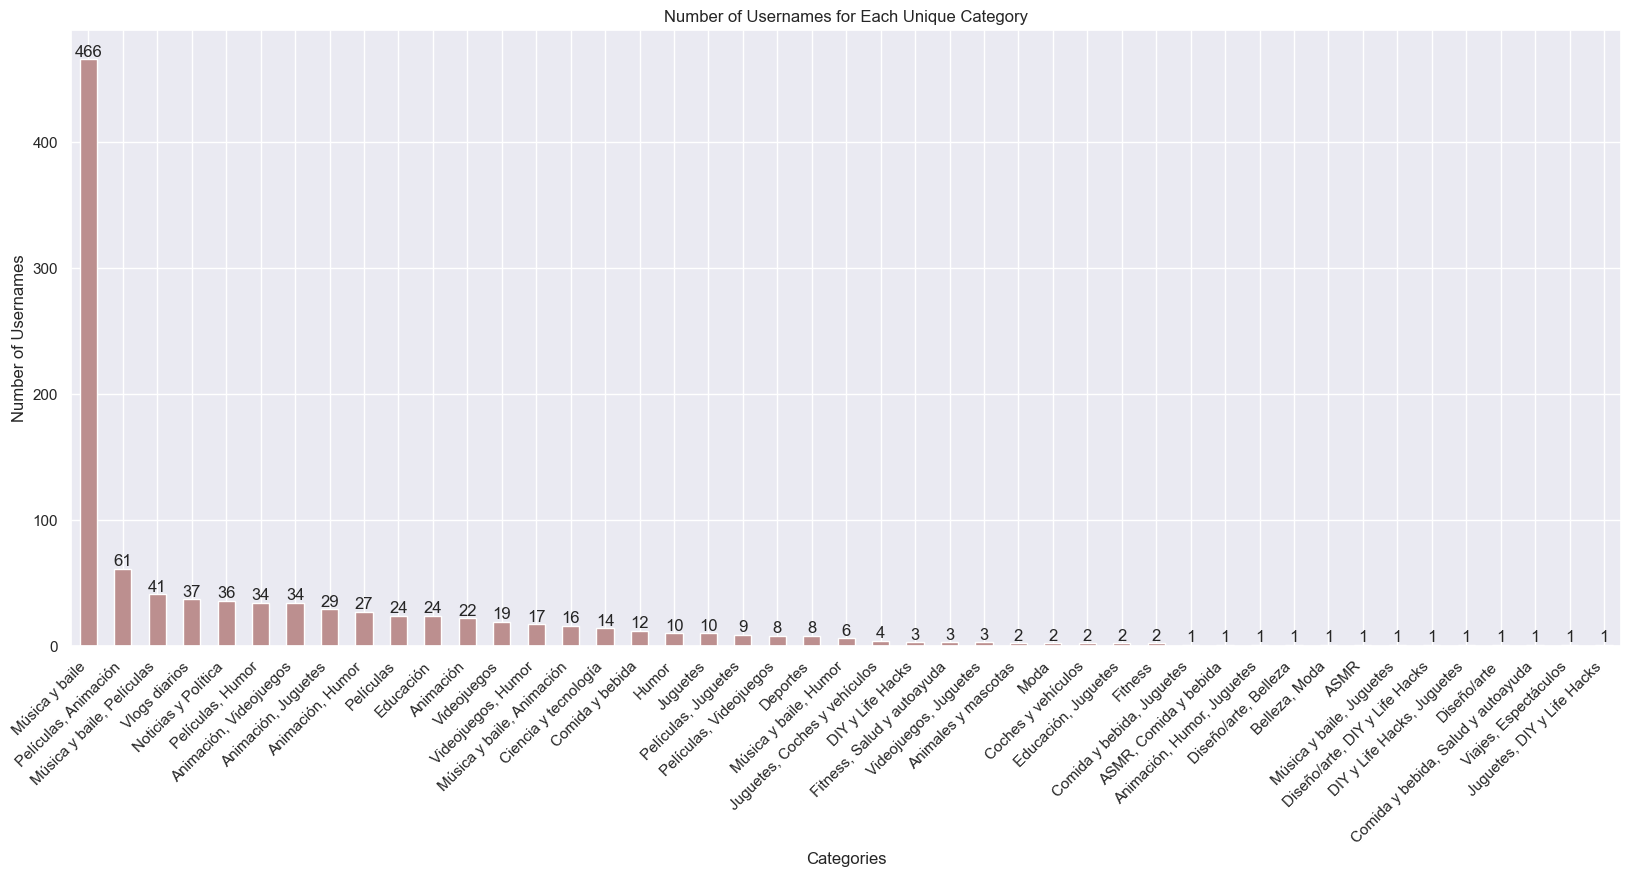

In [40]:
category_counts = df['categories'].value_counts()

# Increase the size of the graph
plt.figure(figsize=(20, 8))

# Plotting
category_counts.plot(kind='bar', color='rosybrown')
plt.xlabel('Categories')
plt.ylabel('Number of Usernames')
plt.title('Number of Usernames for Each Unique Category')

# Displaying the count on top of each bar
for i, count in enumerate(category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()

 out of the 689 channels that were provided for analysis in tat there are 45 Categories , Tseries an Indian channel has the highest subscriber count, Estados Unidos country has the highest channel count, and Mr. Bear's channel has the highest like counts.

# **Performance Metrics:**
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
Are there patterns or anomalies in these metrics?

In [41]:
# calcuating the mean metrics for subscribers, visits, likes and comments
variables = ['subscribers', 'visits', 'likes', 'comments']
var_average = df[variables].mean()
var_average

subscribers    2.189440e+07
visits         1.209446e+06
likes          5.363259e+04
comments       1.288768e+03
dtype: float64

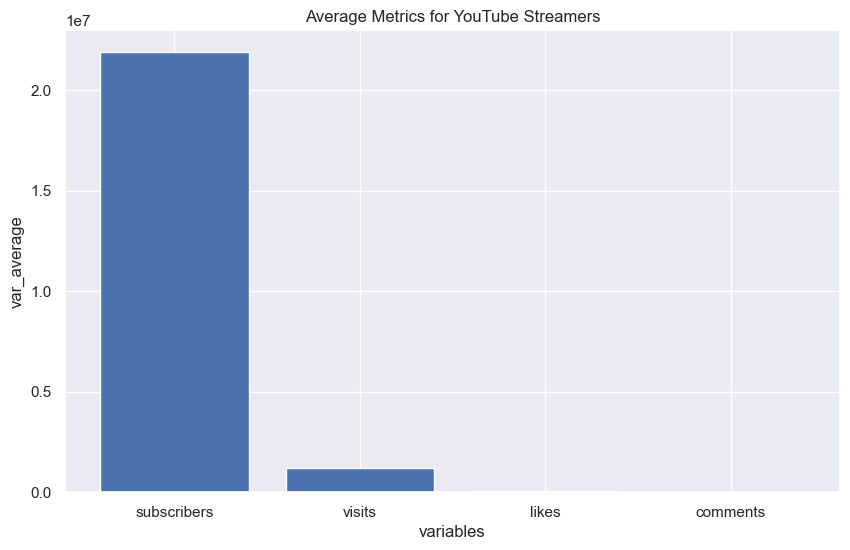

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(variables, var_average)
plt.xlabel('variables')
plt.ylabel('var_average')
plt.title('Average Metrics for YouTube Streamers')
plt.show()

1. From the graph above, we can see that there is a steady decline in the average metrics from Subscribers to Comments of youtube streamers
2. These values could possibly be as a result of diminishing trends in their online engagements and popularity of content or categories over time.
3. This could be as a result of factors such as loss of interest or it could mean that there is a need for strategic interventions to keep streamers engaged.
4. This decline may also mean that there are some challenges in retaining streamers audience or attracting new audience

#### Based on this, I would say that there is a need to engage with audience for feedback to explore innovative ways to retain the interest of their subscribers and visitors


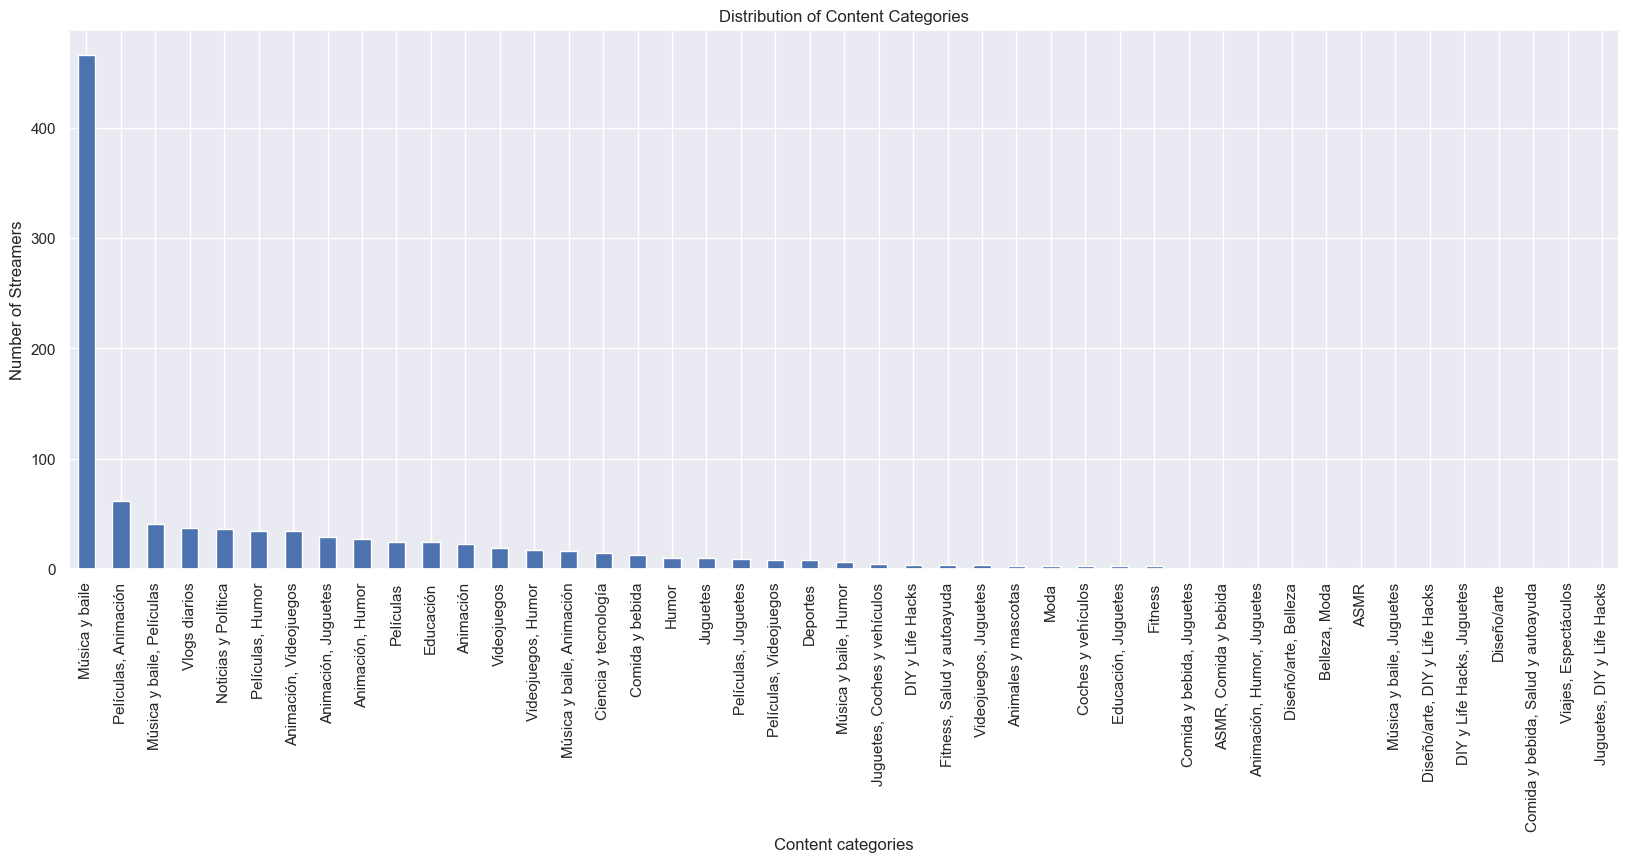

In [43]:
# Plot the distribution of content categories
plt.figure(figsize=(20, 7))
categories_counts.plot(kind='bar')
plt.xlabel('Content categories')
plt.ylabel('Number of Streamers')
plt.title('Distribution of Content Categories')
plt.xticks(rotation=90)
plt.show()

#  BENCHMARKING

# STREAMERS WITH ABOVE AVERAGE PERFORMANCE

In [44]:
# pivot table to sum metrics for each streamer
streamer_metrics = df[['username', 'categories','country', 'subscribers', 'visits', 'likes', 'comments']]

# calculating the average metrics
metrics_avg = var_average

# identifying streamers with above- average performance
above_avg_streamers = streamer_metrics[(streamer_metrics['subscribers'] > metrics_avg['subscribers']) & 
                                       (streamer_metrics['visits'] > metrics_avg['visits']) & 
                                       (streamer_metrics['likes'] > metrics_avg['likes']) & 
                                       (streamer_metrics['comments'] > metrics_avg['comments'])]

In [45]:
# viewing our data
print(f'The above average streamers are: ')
above_avg_streamers

The above average streamers are: 


username                     categories         country  \
1                  MrBeast             Videojuegos, Humor  Estados Unidos   
5                PewDiePie         Películas, Videojuegos  Estados Unidos   
26             dudeperfect                    Videojuegos  Estados Unidos   
34             TaylorSwift                 Música y baile  Estados Unidos   
39             JuegaGerman           Películas, Animación          México   
43                A4a4a4a4               Animación, Humor           Rusia   
58               Mikecrack           Películas, Animación          México   
62          KimberlyLoaiza                 Música y baile          México   
64         luisitocomunica                 Música y baile          México   
70             JessNoLimit           Películas, Animación       Indonesia   
96          TotalGaming093         Películas, Videojuegos           India   
98    TechnoGamerzOfficial                 Música y baile           India   
100             markiplier         Animación, Videojuegos  Estados Unidos   
122                AboFlah         Animación, Videojuegos            Iraq   
123         MRINDIANHACKER                 Música y baile           India   
131           fedevigevani               Animación, Humor          México   
132                  dream         Animación, Videojuegos  Estados Unidos   
136               MrBeast2                  Vlogs diarios  Estados Unidos   
145          jacksepticeye               Animación, Humor  Estados Unidos   
153              DaFuqBoom               Animación, Humor  Estados Unidos   
176               CrazyXYZ                 Música y baile           India   
177                 DanTDM         Animación, Videojuegos  Estados Unidos   
179            brentrivera             Videojuegos, Humor  Estados Unidos   
180               NichLmao                  Vlogs diarios  Estados Unidos   
195             nickiminaj                 Música y baile  Estados Unidos   
206              AlejoIgoa                      Animación       Argentina   
207                  ZHCYT  Diseño/arte, DIY y Life Hacks  Estados Unidos   
234                    rug             Videojuegos, Humor  Estados Unidos   
238             alanbecker         Animación, Videojuegos  Estados Unidos   
241     juandediospantojaa      Música y baile, Películas          México   
266           DrossRotzank                 Música y baile          México   
272          AmiRodrigueZZ               Animación, Humor        Colombia   
278            StokesTwins             Videojuegos, Humor  Estados Unidos   
281                SSundee         Animación, Videojuegos  Estados Unidos   
282   souravjoshivlogs7028                  Vlogs diarios           India   
288  VillageCookingChannel                 Música y baile           India   
300           alfredolarin                 Música y baile     El Salvador   
302             royaltyfam                          Humor  Estados Unidos   

     subscribers       visits      likes  comments  
1    183500000.0  117400000.0  5300000.0   18500.0  
5    111500000.0    2400000.0   197300.0    4900.0  
26    59700000.0    5300000.0   156500.0    4200.0  
34    54100000.0    4300000.0   300400.0   15000.0  
39    48600000.0    2000000.0   117100.0    3000.0  
43    47300000.0    9700000.0   330400.0   22000.0  
58    43400000.0    2200000.0   183400.0    1800.0  
62    42100000.0    5300000.0   271300.0   16000.0  
64    41100000.0    2500000.0   128900.0    1800.0  
70    39600000.0    1300000.0    73500.0    1600.0  
96    36300000.0    1500000.0   129400.0    4900.0  
98    35600000.0    6200000.0   341800.0   16500.0  
100   35500000.0    2100000.0   126500.0    3800.0  
122   32700000.0    3300000.0   382000.0   11400.0  
123   32600000.0    6500000.0   617400.0   26000.0  
131   32000000.0    7700000.0   412200.0   17000.0  
132   31900000.0    3300000.0   309200.0   19000.0  
136   31300000.0   83100000.0  5000000.0   11600.0  
145   3

In [46]:
streamers = above_avg_streamers['username'].count()
print(f'There are {streamers} above average youtube streamers')

There are 38 above average youtube streamers


from the dataframe above we can observe the following:
   -  at a glance, it can be seen that the USA is the top country with the highest number of streamers - 19. This means that the USA has the highest number of above average streamers, who are popular by their categories
   -  Music and Dance is the most popular category (10) with the above average streamers, which is closely marked by Animation and Video Games(6)

# TOP PERFORMING CONTENT CREATORS BY SUBSCRIBERS

In [47]:
# top content categories by subscribers
top_content_creators_subscribers = above_avg_streamers.nlargest(10, 'subscribers')

# top 10 content creators 
print(f'The top performing content creators by subscribers are: ')
top_content_creators_subscribers

The top performing content creators by subscribers are: 


username              categories         country  subscribers  \
1           MrBeast      Videojuegos, Humor  Estados Unidos  183500000.0   
5         PewDiePie  Películas, Videojuegos  Estados Unidos  111500000.0   
26      dudeperfect             Videojuegos  Estados Unidos   59700000.0   
34      TaylorSwift          Música y baile  Estados Unidos   54100000.0   
39      JuegaGerman    Películas, Animación          México   48600000.0   
43         A4a4a4a4        Animación, Humor           Rusia   47300000.0   
58        Mikecrack    Películas, Animación          México   43400000.0   
62   KimberlyLoaiza          Música y baile          México   42100000.0   
64  luisitocomunica          Música y baile          México   41100000.0   
70      JessNoLimit    Películas, Animación       Indonesia   39600000.0   

         visits      likes  comments  
1   117400000.0  5300000.0   18500.0  
5     2400000.0   197300.0    4900.0  
26    5300000.0   156500.0    4200.0  
34    4300000.0   300400.0   15000.0  
39    2000000.0   117100.0    3000.0  
43    9700000.0   330400.0   22000.0  
58    2200000.0   183400.0    1800.0  
62    5300000.0   271300.0   16000.0  
64    2500000.0   128900.0    1800.0  
70    1300000.0    73500.0    1600.0

* Here we see two countries that have the top 10 performing creators - USA and Mexico

# TOP PERFORMING CONTENT CREATORS BY VISITS

In [48]:
# top content categories by visits
top_content_creators_visits = above_avg_streamers.nlargest(10, 'visits')

print(f'The top performing content creators by visits are: ')
top_content_creators_visits

The top performing content creators by visits are: 


username              categories         country  \
1                  MrBeast      Videojuegos, Humor  Estados Unidos   
136               MrBeast2           Vlogs diarios  Estados Unidos   
153              DaFuqBoom        Animación, Humor  Estados Unidos   
288  VillageCookingChannel          Música y baile           India   
300           alfredolarin          Música y baile     El Salvador   
278            StokesTwins      Videojuegos, Humor  Estados Unidos   
43                A4a4a4a4        Animación, Humor           Rusia   
131           fedevigevani        Animación, Humor          México   
238             alanbecker  Animación, Videojuegos  Estados Unidos   
123         MRINDIANHACKER          Música y baile           India   

     subscribers       visits      likes  comments  
1    183500000.0  117400000.0  5300000.0   18500.0  
136   31300000.0   83100000.0  5000000.0   11600.0  
153   29800000.0   52700000.0  1700000.0   82800.0  
288   22500000.0   21500000.0   321500.0    5900.0  
300   21900000.0   12900000.0   707600.0    2100.0  
278   22700000.0   11700000.0   235000.0   10000.0  
43    47300000.0    9700000.0   330400.0   22000.0  
131   32000000.0    7700000.0   412200.0   17000.0  
238   24300000.0    7600000.0   582600.0    5900.0  
123   32600000.0    6500000.0   617400.0   26000.0

 * Here, we still see that the USA takes the top position as the country with the top content creators based on visitors

In [49]:
# top content categories by likes
top_content_creators_likes = above_avg_streamers.nlargest(10, 'likes')

print(f'The top performing content creators by likes are: ')
top_content_creators_likes

The top performing content creators by likes are: 


username              categories         country  \
1                 MrBeast      Videojuegos, Humor  Estados Unidos   
136              MrBeast2           Vlogs diarios  Estados Unidos   
153             DaFuqBoom        Animación, Humor  Estados Unidos   
300          alfredolarin          Música y baile     El Salvador   
123        MRINDIANHACKER          Música y baile           India   
238            alanbecker  Animación, Videojuegos  Estados Unidos   
131          fedevigevani        Animación, Humor          México   
282  souravjoshivlogs7028           Vlogs diarios           India   
122               AboFlah  Animación, Videojuegos            Iraq   
98   TechnoGamerzOfficial          Música y baile           India   

     subscribers       visits      likes  comments  
1    183500000.0  117400000.0  5300000.0   18500.0  
136   31300000.0   83100000.0  5000000.0   11600.0  
153   29800000.0   52700000.0  1700000.0   82800.0  
300   21900000.0   12900000.0   707600.0    2100.0  
123   32600000.0    6500000.0   617400.0   26000.0  
238   24300000.0    7600000.0   582600.0    5900.0  
131   32000000.0    7700000.0   412200.0   17000.0  
282   22700000.0    5600000.0   382300.0    8900.0  
122   32700000.0    3300000.0   382000.0   11400.0  
98    35600000.0    6200000.0   341800.0   16500.0

## TOP PERFORMING CONTENT CREATORS BY COMMENTS 

In [50]:
# top content categories by comments
top_content_creators_comments = above_avg_streamers.nlargest(10, 'comments')

print(f'The top performing content creators by comments are: ')
top_content_creators_comments

The top performing content creators by comments are: 


username              categories         country  \
153             DaFuqBoom        Animación, Humor  Estados Unidos   
177                DanTDM  Animación, Videojuegos  Estados Unidos   
123        MRINDIANHACKER          Música y baile           India   
43               A4a4a4a4        Animación, Humor           Rusia   
132                 dream  Animación, Videojuegos  Estados Unidos   
1                 MrBeast      Videojuegos, Humor  Estados Unidos   
131          fedevigevani        Animación, Humor          México   
98   TechnoGamerzOfficial          Música y baile           India   
62         KimberlyLoaiza          Música y baile          México   
34            TaylorSwift          Música y baile  Estados Unidos   

     subscribers       visits      likes  comments  
153   29800000.0   52700000.0  1700000.0   82800.0  
177   27800000.0    3500000.0   285000.0   52500.0  
123   32600000.0    6500000.0   617400.0   26000.0  
43    47300000.0    9700000.0   330400.0   22000.0  
132   31900000.0    3300000.0   309200.0   19000.0  
1    183500000.0  117400000.0  5300000.0   18500.0  
131   32000000.0    7700000.0   412200.0   17000.0  
98    35600000.0    6200000.0   341800.0   16500.0  
62    42100000.0    5300000.0   271300.0   16000.0  
34    54100000.0    4300000.0   300400.0   15000.0

**Conclusion** 
  * from the above top performing content creators by subscribers, vistis, likes and comments, we can note the following:
  * The USA has the highest number of top performing content creators across all metrics
  *  There are certain streamers who top at least 2 of the metrics - MrBeast, DaFuqBoom, MrBeast2

**Conclusion:**

In conclusion, this report provides content recommendations for a YouTube streamer based on the available data. By analyzing visits, comments, subscribers, and ranking data, the streamer can optimize their content strategy to attract more viewers, foster engagement, and increase their online presence. Additionally, addressing missing values and removing duplicate data ensures the integrity and accuracy of the analysis. Implementing these recommendations can contribute to the streamer's growth and success on YouTube.

In [51]:
df.head()

rank       username           categories  subscribers         country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia       Música y baile  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        visits      likes  comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...

In [52]:
# importing libraries
from sklearn.preprocessing import LabelEncoder

In [53]:
# create an instance of label encoder
label_encoder = LabelEncoder()

In [54]:
# Specify columns to be encoded
columns_to_encode = ['categories', 'username', 'country', 'links']

# Fit and transform data using label encoder
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [55]:
df.head()

rank  username  categories  subscribers  country       visits      likes  \
0     1       939          29  249500000.0       13      86200.0     2700.0   
1     2       368          42  183500000.0       10  117400000.0  5300000.0   
2     3       107          20  165500000.0       28    7000000.0    24700.0   
3     4       467          29  162600000.0       13      15600.0      166.0   
4     5       275           5  113500000.0       28    3900000.0    12400.0   

   comments  links  
0      78.0    826  
1   18500.0    506  
2       0.0    588  
3       9.0    807  
4       0.0    731

In [56]:
## Splitting input and output data as X and y resp.
X = df.drop("rank", axis=1)
y = df["rank"]

In [57]:
## Checking shape of the input columns
X.shape

(1000, 8)

In [58]:
## Checking shape of the output column
y.shape

(1000,)

## Working on dataset with PCA -> Principal component analysis

In [59]:
## Importing PCA 
from sklearn.decomposition import PCA

In [60]:
## Using algorithem PCA, Taking n components as 6
pc = PCA(n_components=6)

In [61]:
# Fitting and transforming the model
new_data =pc.fit_transform(X) 

In [62]:
new_data

array([[ 2.26715562e+08, -2.01400274e+07,  8.17373346e+04,
         3.10312170e+03,  5.65483689e+02,  1.28716746e+01],
       [ 1.70759631e+08,  1.02397534e+08, -1.79249796e+05,
        -2.94681626e+04, -4.77973212e+01,  5.36586911e+01],
       [ 1.43586655e+08, -6.23769257e+06, -2.51559632e+05,
         2.09081439e+01, -2.24171107e+02,  3.71761298e+02],
       ...,
       [-1.02422579e+07, -1.44053357e+05, -9.36225384e+03,
        -9.99154728e+02, -3.74482751e+01,  2.29976271e+02],
       [-1.02587407e+07, -3.40575250e+05, -7.21463146e+02,
        -9.53285733e+02, -1.30298781e+02, -2.34365155e+01],
       [-1.02597260e+07, -3.52323244e+05, -2.15240575e+02,
        -9.50485893e+02, -1.37231731e+02, -1.34207475e+01]])

In [63]:
# Return components(eigen vectors)
pc.components_ 

array([[ 1.50948292e-07,  1.29629024e-08,  9.96502378e-01,
         1.85226001e-08,  8.34872569e-02,  3.59009061e-03,
         1.78703446e-05, -2.71565662e-07],
       [-1.42513028e-06,  4.00947066e-08, -8.35636782e-02,
        -1.15068530e-07,  9.95393557e-01,  4.69956282e-02,
         4.34176725e-04,  7.97337061e-07],
       [-9.10141774e-06,  2.20821062e-06,  3.50064892e-04,
        -6.16615899e-06, -4.71327644e-02,  9.98877803e-01,
         4.63622900e-03, -1.39583991e-04],
       [-2.09501847e-03, -1.05545118e-04,  1.68519719e-05,
        -8.03824728e-05, -2.15167450e-04, -4.65128963e-03,
         9.99985257e-01,  1.84361250e-03],
       [ 7.00200358e-01, -1.48092566e-03,  9.17404302e-08,
        -3.48562613e-04, -4.59580045e-06,  1.05230561e-04,
         1.51001580e-04,  7.13944753e-01],
       [-7.13942893e-01, -1.72459484e-03,  4.13530975e-07,
         7.22522677e-04, -5.24459426e-06,  1.04033821e-04,
        -2.78629570e-03,  7.00195883e-01]])

In [64]:
## Importing train test split
from sklearn.model_selection import train_test_split

In [65]:
## Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(new_data, y, train_size=0.75, random_state=34)

In [66]:
## Checking shape of train input data
X_train.shape

(750, 6)

In [67]:
## Checking shape of train output data
y_train.shape

(750,)

* As the numeric values has lot of difference , hence we have to apply StandardScaler.

In [68]:
## Importing Standard scaler
from sklearn.preprocessing import StandardScaler

In [69]:
## Applying standard scaler because data has numeric values which has significant diffrence.
scaler = StandardScaler()

In [70]:
## Scaling input train data using scaler function
X_train = scaler.fit_transform(X_train)

In [71]:
## Scaling input testing data using scaler function
## We only transform the test data 
X_test = scaler.transform(X_test)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
# Make predictions
y_pred = model.predict(X_test)


In [75]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 41642.23604693724
R^2 Score: 0.4358790741426941
